# Task 1: Set Up Your Environment

### 1.1 Install Apache Spark (Windows 11 Example).

#### **Perquisites**  
- Java JDK (8 or later, but don't exceed 17.0) <br>
Spark runs on the JVM, so Java is required.

- Python 3.x <br>
For PySpark support and Jupyter integration.

- Environment Variables (JAVA_HOME, SPARK_HOME, etc.) <br>
---

#### **Install Java JDK**
Apache Spark requires Java (version 8 or later is fine). <br>

a. Download JDK <br>
Go to: https://adoptium.net

Select: Temurin 11 (LTS recommended) <br>

Download the Windows x64 MSI installer <br>

b. Install and Set JAVA_HOME <br>
After installing:

#### **Open Environment Variables (Win + S - search for Environment Variables)**

Under System variables, click New: <br>

Name: JAVA_HOME <br>

Value: C:\Program Files\Eclipse Adoptium\jdk-11.x.x (or whatever matches your version) <br>

Add %JAVA_HOME%\bin to the Path variable. <br>

---

#### **Install Apache Spark**
a. Download Spark Binary <br>
Go to: https://spark.apache.org/downloads.html

Choose a version (e.g., Spark 3.5.0) <br>

Choose a package type: (Pre-built for Apache Hadoop 3) <br>

Download and unzip the folder (e.g., to C:\spark) <br>

b. Set SPARK_HOME and PATH <br>
In Environment Variables:

Add a new variable: <br>

Name: SPARK_HOME <br>

Value: C:\spark <br>

Add %SPARK_HOME%\bin to the Path <br>

---

#### **Install winutils.exe (for Hadoop compatibility)**
Spark on Windows needs a workaround to run without full Hadoop. <br>

a. Download winutils.exe <br>
Go to: <br>
https://github.com/steveloughran/winutils

Find your Hadoop version (e.g., hadoop-3.3.1\bin\winutils.exe) <br>

Place the winutils.exe file in: C:\hadoop\bin <br>

b. Set HADOOP_HOME <br>
In Environment Variables:

Name: HADOOP_HOME <br>

Value: C:\hadoop <br>

Also add %HADOOP_HOME%\bin to your Path <br>

---
#### **Install PySpark in Your Virtual Environment**
In VS Code terminal (with virtual environment activated): <br>
    - (In VS Code CTRL + ` to open the Terminal Powershell Environment)

```bash
pip install pyspark
```

(Optional: for Jupyter support)

```bash
pip install notebook findspark
```


### 1.2 Set Up SQLite JDBC Driver

#### **Download SQLite JDBC Driver**
Go to the official repository: <br>

https://github.com/xerial/sqlite-jdbc


#### **Direct Download Link for the Latest .jar:**

https://repo1.maven.org/maven2/org/xerial/sqlite-jdbc/
Choose the latest version (e.g., sqlite-jdbc-3.49.1.0.jar). <br>

#### **Create a directory to store the driver**
Create a folder in your project directory to store the JDBC .jar file: <br>

```bash
mkdir jdbc_drivers
```
Then move the downloaded .jar into that folder (e.g., jdbc_drivers/sqlite-jdbc-3.49.1.0.jar). <br>

In your Jupyter Notebook or script (spark.ipynb), you’ll reference the JDBC driver when creating the Spark session:


In [120]:
%pip install findspark
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("SmartSales") \
    .config("spark.jars", "jdbc_drivers/sqlite-jdbc-3.49.1.0.jar") \
    .getOrCreate()

print("Spark Session created successfully!")

Note: you may need to restart the kernel to use updated packages.
Spark Session created successfully!


### 1.3 Verify PySpark Works in Jupyter Notebook

In [121]:
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("SmartSales").getOrCreate()
print(spark)

### 1.4 Verify the SQLite JDBC Driver Works

In [122]:
df_sales = spark.read.format("jdbc") \
    .option("url", "jdbc:sqlite:data/dw/smart_sales.db") \
    .option("dbtable", "sales") \
    .option("driver", "org.sqlite.JDBC") \
    .load()

df_sales.show(5)

+--------------+----------+-----------+----------+--------+-----------+-----------+----------------+------------+
|transaction_id| sale_date|customer_id|product_id|store_id|campaign_id|sale_amount|discount_percent|payment_type|
+--------------+----------+-----------+----------+--------+-----------+-----------+----------------+------------+
|           550|2024-01-06|       1008|       102|     404|          0|       39.1|               0|        VISA|
|           551|2024-01-06|       1009|       105|     403|          0|      19.78|               2|        VISA|
|           552|2024-01-16|       1004|       107|     404|          0|      335.1|               0|          MC|
|           553|2024-01-16|       1006|       102|     406|          0|      195.5|               0|        VISA|
|           554|2024-01-25|       1005|       102|     405|          0|      117.3|               0|        VISA|
+--------------+----------+-----------+----------+--------+-----------+-----------+-----

## Task 2: Connect to Your Data Warehouse

### 2.1 Start a Jupyter Notebook

See above steps. <br>

### 2.2 Connect to SQLite using PySpark

Using Spark’s JDBC API to connect to the SQLite database `smart_sales.db`, which exists in the /data/dw/ folder. <br>

In [123]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("SmartSales") \
    .config("spark.jars", "jdbc_drivers/sqlite-jdbc-3.49.1.0.jar") \
    .getOrCreate()

print(spark)

### 2.3 Verify Tables are Loaded

#### 2.3.1. Sales
Loading a table (sales) from the SQLite database into a Spark DataFrame and displaying it. <br>

In [124]:
df_sales = spark.read.format("jdbc") \
    .option("url", "jdbc:sqlite:C:/Projects/smart-store-data-git-hub/data/dw/smart_sales.db") \
    .option("dbtable", "sales") \
    .option("driver", "org.sqlite.JDBC") \
    .load()

df_sales.show()


+--------------+----------+-----------+----------+--------+-----------+-----------+----------------+------------+
|transaction_id| sale_date|customer_id|product_id|store_id|campaign_id|sale_amount|discount_percent|payment_type|
+--------------+----------+-----------+----------+--------+-----------+-----------+----------------+------------+
|           550|2024-01-06|       1008|       102|     404|          0|       39.1|               0|        VISA|
|           551|2024-01-06|       1009|       105|     403|          0|      19.78|               2|        VISA|
|           552|2024-01-16|       1004|       107|     404|          0|      335.1|               0|          MC|
|           553|2024-01-16|       1006|       102|     406|          0|      195.5|               0|        VISA|
|           554|2024-01-25|       1005|       102|     405|          0|      117.3|               0|        VISA|
|           555|2024-01-25|       1001|       101|     401|          0|    2379.36|     

#### 2.3.2. Products
Loading a table (products) from the SQLite database into a Spark DataFrame and displaying it. <br>

In [125]:
df_products = spark.read.format("jdbc") \
    .option("url", "jdbc:sqlite:C:/Projects/smart-store-data-git-hub/data/dw/smart_sales.db") \
    .option("dbtable", "products") \
    .option("driver", "org.sqlite.JDBC") \
    .load()

df_products.show()


+----------+------------+-----------+----------+--------------+----------+
|product_id|product_name|   category|unit_price|stock_quantity|  supplier|
+----------+------------+-----------+----------+--------------+----------+
|       101|      laptop|Electronics|    793.12|            15|     China|
|       102|      hoodie|   Clothing|      39.1|           154|     China|
|       103|       cable|Electronics|     22.76|           560|      Cuba|
|       104|         hat|   Clothing|      43.1|          1520|SouthKorea|
|       105|    football|     Sports|     19.78|           106|    Russia|
|       106|  controller|Electronics|     88.98|            57|    Russia|
|       107|      jacket|   Clothing|     67.02|             0|    Canada|
|       108|   protector|Electronics|     12.56|            21|    Mexico|
+----------+------------+-----------+----------+--------------+----------+



#### 2.3.3. Customers
Loading a table (customers) from the SQLite database into a Spark DataFrame and displaying it. <br>

In [126]:
df_customers = spark.read.format("jdbc") \
    .option("url", "jdbc:sqlite:C:/Projects/smart-store-data-git-hub/data/dw/smart_sales.db") \
    .option("dbtable", "customers") \
    .option("driver", "org.sqlite.JDBC") \
    .load()

df_customers.show()


+-----------+----------------+------+----------+--------------+----------------+-----------------+
|customer_id|            name|region| join_date|loyalty_points|customer_segment|standard_datetime|
+-----------+----------------+------+----------+--------------+----------------+-----------------+
|       1001|   William White|  East|11/11/2021|          1000|             Tin|       2021-11-11|
|       1002|    Wylie Coyote|  East| 2/14/2023|          1250|             Tin|       2023-02-14|
|       1003|       Dan Brown|  West|10/19/2023|          3520|            Gold|       2023-10-19|
|       1004|       Chewbacca|  West| 11/9/2022|          9650|         Diamond|       2022-11-09|
|       1005|          Dr Who| North| 8/18/2023|          2560|             Tin|       2023-08-18|
|       1006|   Tiffany James| South|  6/7/2021|           100|         Diamond|       2021-06-07|
|       1007|   Susan Johnson| South| 6/30/2023|         69850|          Silver|       2023-06-30|
|       10

### Task 3: Query & Aggregate Data

#### 3.1 Write a Spark SQL Query for Total Revenue per Customer

Using Spark SQL to query the temporary views (`customers`, `sales`) created earlier. This step performs a join between `sales` and `customers`, then aggregates the total sales amount per customer (`SUM`(`sale_amount`)). <br>

In [127]:
# Create views for Spark SQL
df_sales.createOrReplaceTempView("sales")
df_customers.createOrReplaceTempView("customers")
df_products.createOrReplaceTempView("products")


df_top_customers = spark.sql("""
SELECT 
    c.name, 
    ROUND(SUM(s.sale_amount), 2) AS total_spent
FROM sales s
JOIN customers c ON s.customer_id = c.customer_id
GROUP BY c.name
ORDER BY total_spent DESC
""")

df_top_customers.show()


+----------------+-----------+
|            name|total_spent|
+----------------+-----------+
|   William White|   23752.52|
|Hermione Granger|   22822.54|
|   Susan Johnson|    12422.6|
|       Chewbacca|   11813.44|
|   Tiffany James|   11715.82|
| Hermione Grager|    8750.94|
|    Wylie Coyote|    7434.44|
|          Dr Who|    4064.86|
|       Dan Brown|     2427.3|
|    Jason Bourne|    1806.34|
|      Tony Stark|    1545.54|
+----------------+-----------+



#### 3.2 Store the Results in a Pandas DataFrame for Visualization
Converting the Spark DataFrame to a Pandas DataFrame so you can use visualization libraries like matplotlib or seaborn later in your notebook. <br>

In [128]:
import pandas as pd
df_top_customers_pd = df_top_customers.toPandas()

#### 3.3 Review the Results
Visual inspection of the data in the Jupyter notebook by displaying the DataFrame. <br>

In [129]:
df_top_customers_pd.head()

,name,total_spent
0,William White,23752.52
1,Hermione Granger,22822.54
2,Susan Johnson,12422.60
3,Chewbacca,11813.44
4,Tiffany James,11715.82


### Task 4: Slice, Dice, and Drilldown

#### 4.1 Slicing: Filter Sales by Date Range
Slicing is a technique in Business Intelligence where a filter is apllied to the dataset based on a specific value or range — in this case, we're filtering sales data to include only transactions on or after January 1, 2023. <br>

In [130]:
from pyspark.sql.functions import to_date
df_sales = df_sales.withColumn("sale_date", to_date("sale_date"))
df_filtered = df_sales.filter(df_sales.sale_date >= "2023-01-01")
df_filtered.show()

+--------------+----------+-----------+----------+--------+-----------+-----------+----------------+------------+
|transaction_id| sale_date|customer_id|product_id|store_id|campaign_id|sale_amount|discount_percent|payment_type|
+--------------+----------+-----------+----------+--------+-----------+-----------+----------------+------------+
|           550|2024-01-06|       1008|       102|     404|          0|       39.1|               0|        VISA|
|           551|2024-01-06|       1009|       105|     403|          0|      19.78|               2|        VISA|
|           552|2024-01-16|       1004|       107|     404|          0|      335.1|               0|          MC|
|           553|2024-01-16|       1006|       102|     406|          0|      195.5|               0|        VISA|
|           554|2024-01-25|       1005|       102|     405|          0|      117.3|               0|        VISA|
|           555|2024-01-25|       1001|       101|     401|          0|    2379.36|     

#### 4.2 Dicing: Group Sales by Product and Region
Dicing is analyzing data from multiple dimensions. By grouping sales by product name and customer region to get a breakdown of performance. <br>

In [131]:
from pyspark.sql.functions import sum, format_number

# Join necessary tables
df_matrix = df_sales.join(df_products, "product_id") \
                    .join(df_customers, "customer_id")

# Create matrix using pivot
df_product_region_matrix = df_matrix.groupBy("product_name") \
    .pivot("region") \
    .agg(format_number(sum("sale_amount"), 2))  # format to 2 decimal places

df_product_region_matrix.show()

+------------+---------+--------+---------+---------+
|product_name|     East|   North|    South|     West|
+------------+---------+--------+---------+---------+
|       cable|   227.60|    NULL|   204.84|    22.76|
|  controller| 1,245.72|1,690.62| 1,245.72|     NULL|
|      laptop|56,311.52|    NULL|19,034.88|13,483.04|
|    football|   276.92|  336.26|    39.56|    19.78|
|         hat| 1,508.50|  818.90|   991.30|   689.60|
|      jacket| 2,144.64|2,412.72| 1,809.54|   938.28|
|      hoodie|   430.10|  351.90|   586.50|   742.90|
|   protector|   615.44|    NULL|   226.08|   150.72|
+------------+---------+--------+---------+---------+



#### 4.3 Drilldown: Aggregate Sales by Year -> Quarter -> Month
Drilldown allows users to navigate from summarized data into more detailed levels. Analyzing sales first by Year, then Quarter, then Month. <br>

In [132]:
from pyspark.sql.functions import year, quarter, month, sum as _sum
import pandas as pd

# Step 1: Extract date parts from sale_date
df_sales_with_date = df_sales.withColumn("year", year("sale_date")) \
                             .withColumn("quarter", quarter("sale_date")) \
                             .withColumn("month", month("sale_date"))

# Step 2: Group by Year
df_year = df_sales_with_date.groupBy("year") \
    .agg(_sum("sale_amount").alias("total_sales")) \
    .orderBy("year") \
    .toPandas()
df_year["label"] = df_year["year"].astype(str)
df_year["level"] = "year"
df_year["total_sales"] = df_year["total_sales"].map(lambda x: f"{x:.2f}")

# Step 3: Group by Year + Quarter
df_quarter = df_sales_with_date.groupBy("year", "quarter") \
    .agg(_sum("sale_amount").alias("total_sales")) \
    .orderBy("year", "quarter") \
    .toPandas()
df_quarter["label"] = "  Q" + df_quarter["quarter"].astype(str)
df_quarter["level"] = "quarter"
df_quarter["total_sales"] = df_quarter["total_sales"].map(lambda x: f"{x:.2f}")

# Step 4: Group by Year + Quarter + Month
df_month = df_sales_with_date.groupBy("year", "quarter", "month") \
    .agg(_sum("sale_amount").alias("total_sales")) \
    .orderBy("year", "quarter", "month") \
    .toPandas()
df_month["label"] = "    M" + df_month["month"].astype(str)
df_month["level"] = "month"
df_month["total_sales"] = df_month["total_sales"].map(lambda x: f"{x:.2f}")

# Step 5: Combine all levels into one DataFrame
combined = pd.concat([
    df_year[["year", "label", "total_sales", "level"]],
    df_quarter[["year", "label", "total_sales", "level"]],
    df_month[["year", "label", "total_sales", "level"]]
]).sort_values(by=["year", "level"], key=lambda col: col.map({"year": 0, "quarter": 1, "month": 2}))

combined.reset_index(drop=True, inplace=True)

# Display in notebook
print(combined[["label", "total_sales"]])

# Save to text file
output_path = "C:/Projects/smart-store-data-git-hub/data/processed/2024_Drilldown.txt"
with open(output_path, "w") as f:
    f.write(combined[["label", "total_sales"]].to_string(index=False, justify="left"))


      label total_sales
0      2024   108556.34
1        Q1    33172.66
2        Q2    34372.02
3        Q3    35158.12
4        Q4     5853.54
5        M1     6431.02
6        M2    14591.46
7        M3    12150.18
8        M4    16945.10
9        M5    10982.82
10       M6     6444.10
11       M7    21038.12
12       M8     4627.20
13       M9     9492.80
14      M10     5853.54


### Task 5: Create Interactive Visualizations

#### 5.1 Create a Bar Chart for Top Customers

A bar chart was created with the customer names on the x-axis and their total spending on the y-axis. This chart helps identify which customers are contributing the most to the revenue. <br>

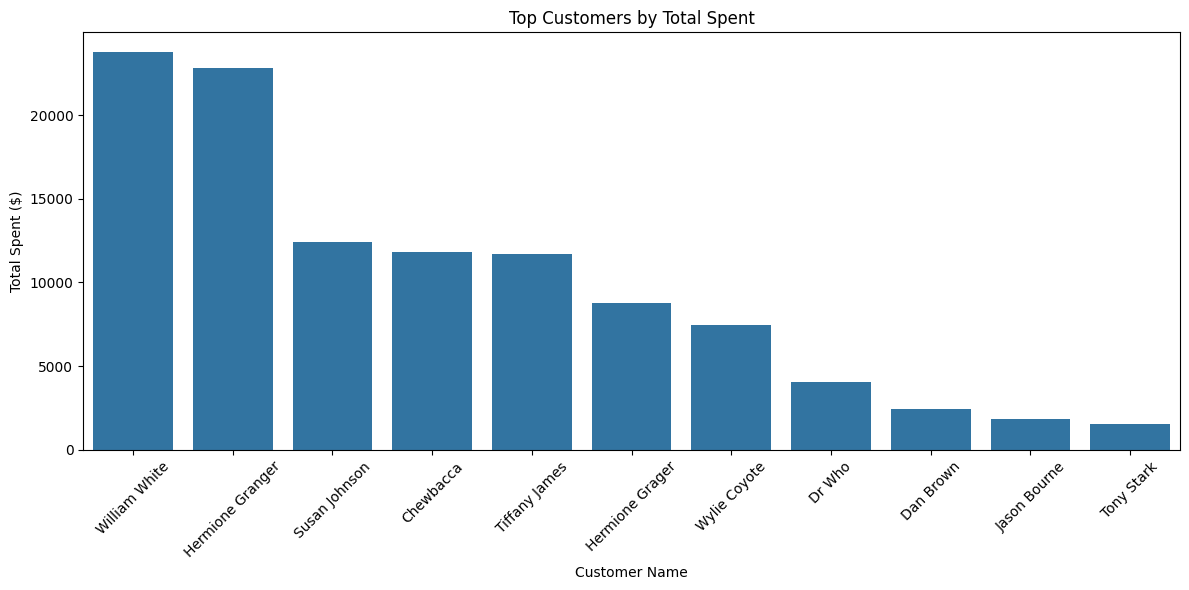

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=df_top_customers_pd, x="name", y="total_spent")
plt.xticks(rotation=45)
plt.title("Top Customers by Total Spent")
plt.xlabel("Customer Name")
plt.ylabel("Total Spent ($)")
plt.tight_layout()
plt.show()

#### 5.2 Create a Line Chart for Sales Trends

The monthly data was used to generate a time series line chart, where each point represents the total sales for a specific month. This visualization helps track fluctuations in sales over time and identify seasonal patterns or spikes. <br>

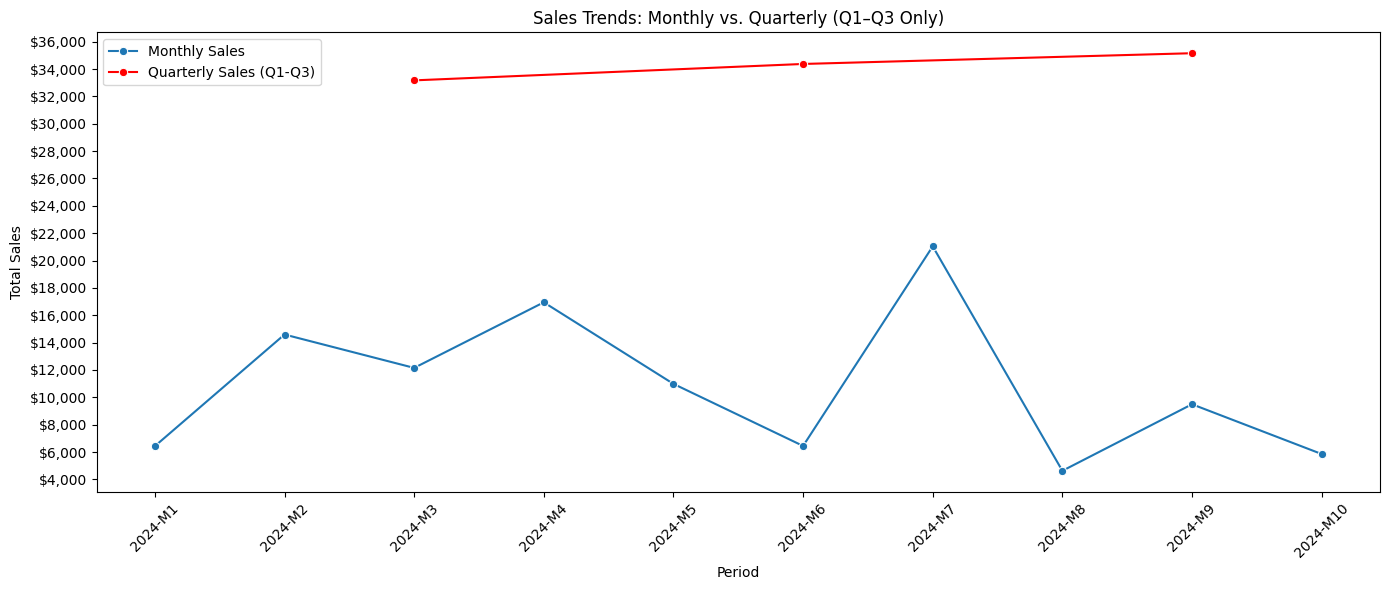

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Prepare monthly sales
monthly_sales = combined[combined["level"] == "month"].copy()
monthly_sales["month_label"] = monthly_sales["year"].astype(str) + "-" + monthly_sales["label"].str.strip()
monthly_sales["total_sales"] = monthly_sales["total_sales"].astype(float)

# Prepare quarterly sales (only Q1, Q2, Q3)
quarterly_sales = combined[(combined["level"] == "quarter") & (combined["label"].str.contains("Q[1-3]"))].copy()
# Align with last month of each quarter for x-axis
quarter_map = {"Q1": "M3", "Q2": "M6", "Q3": "M9"}
quarterly_sales["quarter_raw"] = quarterly_sales["label"].str.strip()
quarterly_sales["month_label"] = quarterly_sales["year"].astype(str) + "-" + quarterly_sales["quarter_raw"].map(quarter_map)
quarterly_sales["total_sales"] = quarterly_sales["total_sales"].astype(float)

# Plot
plt.figure(figsize=(14, 6))

# Monthly sales in blue
sns.lineplot(data=monthly_sales, x="month_label", y="total_sales", marker="o", label="Monthly Sales")

# Quarterly sales in red
sns.lineplot(data=quarterly_sales, x="month_label", y="total_sales", marker="o", color="red", label="Quarterly Sales (Q1-Q3)")

# Y-axis in $2,000 steps
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(2000))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${x:,.0f}"))

plt.title("Sales Trends: Monthly vs. Quarterly (Q1–Q3 Only)")
plt.xlabel("Period")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### Task 6: Document & Submit Your Work

#### Update README.md

1. Describe your SQL queries and reports. <br>
2. Explain dashboard design choices. <br>
3. Include screenshot of: Power BI Model View / Spark SQL Schema <br>
4. Include screenshot of: Query results <br>
5. Include screenshot of: Final Dashboard / Charts <br>